In [6]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import matplotlib
from functools import partial

In [7]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [8]:
def valuelabel(weight,students):
    for i in range(len(weight)):
        plt.text(i,students[i],students[i], ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))

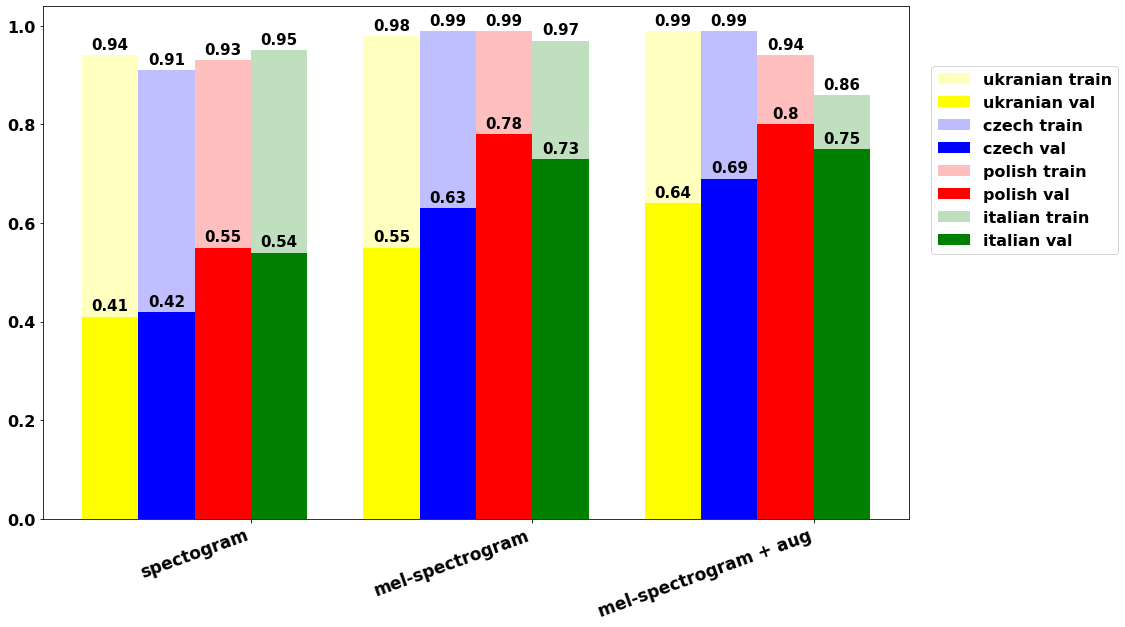

In [18]:
labels = ['spectogram', 'mel-spectrogram', 'mel-spectrogram + aug']
results = {
    'ukranian': [0.41, 0.94, 0.55, 0.98, 0.64, 0.99],
    'czech': [0.42, 0.91, 0.63, 0.99, 0.69, 0.99],
    'polish': [0.55, 0.93, 0.78, 0.99, 0.8, 0.94],
    'italian': [0.54, 0.95, 0.73, 0.97, 0.75, 0.86]
}

colors = ['yellow', 'blue', 'red', 'green']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
for i, (language, values) in enumerate(results.items()):
    train_rect = ax.bar(x + width * (i - len(results) / 2), values[1::2], width, label=f'{language} train', alpha=0.25, color=colors[i])
    val_rect = ax.bar(x + width * (i - len(results) / 2), values[::2], width, label=f'{language} val', color = colors[i])
    ax.bar_label(train_rect, padding=3, fontsize='15')
    ax.bar_label(val_rect, padding=3, fontsize='15')

# rects_val = 
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects1 = ax.bar(x + width/2, men_means, width, label='wtf', alpha=0.5)
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
plt.xticks(x + width/2, labels, rotation=20, fontweight='bold', fontsize='17', horizontalalignment='right')

ax.legend(bbox_to_anchor=(1.25, 0.9))

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

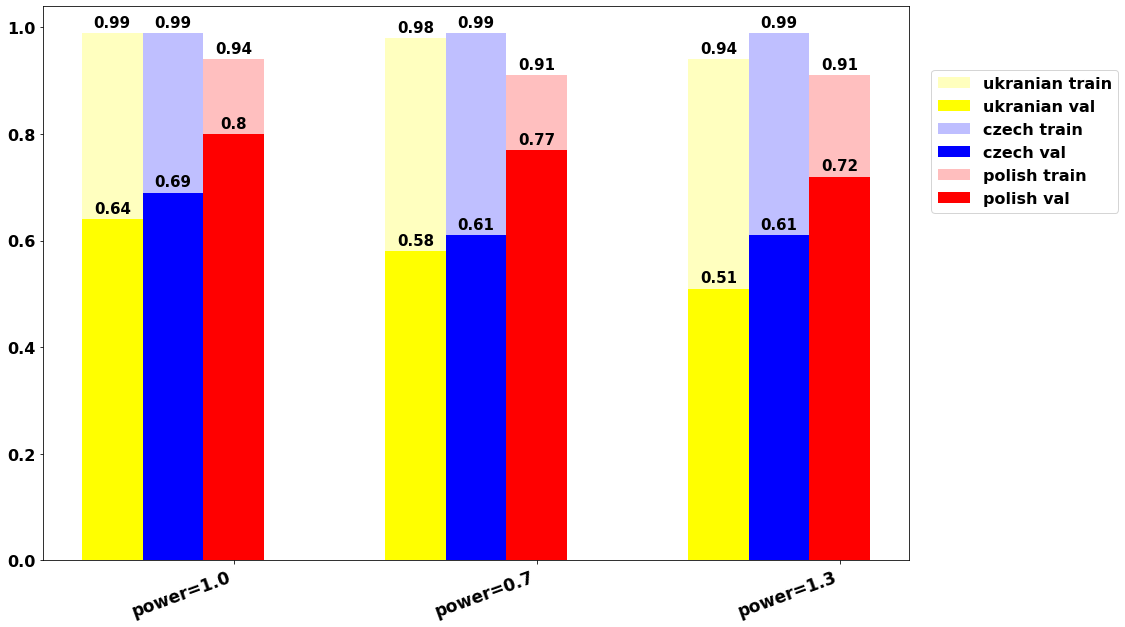

In [20]:
labels = ['power=1.0', 'power=0.7', 'power=1.3']
results = {
    'ukranian': [0.64, 0.99, 0.58, 0.98, 0.51, 0.94],
    'czech': [0.69, 0.99, 0.61, 0.99, 0.61, 0.99],
    'polish': [0.8, 0.94, 0.77, 0.91, 0.72, 0.91],
}

colors = ['yellow', 'blue', 'red']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
for i, (language, values) in enumerate(results.items()):
    train_rect = ax.bar(x + width * (i - len(results) / 2), values[1::2], width, label=f'{language} train', alpha=0.25, color=colors[i])
    val_rect = ax.bar(x + width * (i - len(results) / 2), values[::2], width, label=f'{language} val', color = colors[i])
    ax.bar_label(train_rect, padding=3, fontsize='15')
    ax.bar_label(val_rect, padding=3, fontsize='15')

# rects_val = 
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects1 = ax.bar(x + width/2, men_means, width, label='wtf', alpha=0.5)
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
plt.xticks(x + width/2, labels, rotation=20, fontweight='bold', fontsize='17', horizontalalignment='right')

ax.legend(bbox_to_anchor=(1.25, 0.9))

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [3]:
def simplify_dataset(data):
    df = data[data['VALID']==True][['SET', 'LINK', 'WORD']]
    df = df.rename(columns={'SET': 'mode', 'LINK': 'path', 'WORD': 'label'})
    df['mode'] = df['mode'].map({'TEST': 'test', 'DEV': 'val', 'TRAIN': 'train'})
    df['path'] = df['path'].apply(lambda x: x.replace('.opus', '.wav'))
    df = df[['mode', 'label', 'path']]
    return df

def stats_dataset(data):
    df = pd.DataFrame(data['label'].value_counts()).rename(columns={'label': 'count'})
    for mode in data['mode'].unique():
        df[mode] = data[data['mode']==mode]['label'].value_counts()
        df[mode] = df[mode].fillna(0).astype(dtype=int)
    return df

def select_by_val(data, count):
    return list(data[data['val'] >= count].index)


def select_most_frequent(data, count):  
    df = data.sort_values('count', axis=0, ascending=False)
    return list(df[:count].index)

def select_all(stats):
    return list(stats['label'].unique())

In [34]:
def analyze_dataset(language, transform):
    path_to_csv=f"dataset/multilingual_spoken_words/csv/{language}/{language}_splits.csv"
    data = pd.read_csv(path_to_csv, delimiter=",")
    data = simplify_dataset(data)
    stats = stats_dataset(data)
    result = transform(stats)
    display(result)
    display(f"labels: {len(result)}, count_ratio: {result['count'].sum() / stats['count'].sum()}, count: {result['count'].sum()}")
    display(f"average count: {result['count'].mean()}")
#     display(result)
#     display(f"label ratio: {len(result['label'].unique())}/{len(data['label'].unique())}  summary ratio: {len(result) / len(data)}")

In [23]:
def by_val(df, count):
    return df[df['val'] >= count]

def by_count(df, count):
    return df[df['count'] >= count]

def by_top(df, count):
    return df[:count]

def by_minimal_length(df, count):
    return df[df.index.map(lambda x: len(x) >= count)]


def by_count_and_len(df, count, len_count):
    data = df[df.index.map(lambda x: len(x) >= len_count)]
    return data[data['count']>=count]

def by_top_and_len(df, top, len_count):
    data = df[df.index.map(lambda x: len(x) >= len_count)]
    return data[:top]

def by_labels(df, labels):
    return df[df['']]

In [42]:
transforms = [
#     partial(by_top, count=500),
#     partial(by_count, count=200),
#     partial(by_minimal_length, count=6)
#     partial(by_count_and_len, count=20, len_count=6)
    partial(by_top_and_len, top=180, len_count=4),
#     partial(by_top_and_len, top=180, len_count=3)
]
# transform = partial(by_top, count=360)

languages = ["tt", "cs", "uk", "el", "pl", "ru"]

for language in languages:
    print(language)
    for transform in transforms:
        analyze_dataset(language, transform)

tt


,count,test,val,train
белән,1426,82,123,1221
алар,1065,99,114,852
шулай,573,55,39,479
алып,551,47,33,471
икән,540,34,45,461
...,...,...,...,...
шуңа,73,20,5,48
ярый,72,22,7,43
кырык,72,10,6,56
кызы,71,6,9,56


'labels: 180, count_ratio: 0.31031893836718377, count: 31826'

'average count: 176.8111111111111'

,count,test,val,train
бер,1722,95,130,1497
белән,1426,82,123,1221
алар,1065,99,114,852
бик,816,72,42,702
мин,772,45,40,687
...,...,...,...,...
озак,89,8,9,72
егетне,88,8,8,72
калган,88,9,23,56
килде,87,7,7,73


'labels: 180, count_ratio: 0.4044013689681062, count: 41475'

'average count: 230.41666666666666'

cs


,count,test,train,val
jsem,1370,127,1108,135
jsou,563,58,445,60
není,523,53,417,53
jako,434,46,344,44
ještě,425,39,341,45
...,...,...,...,...
budete,59,6,47,6
lepší,58,6,46,6
doma,57,6,45,6
můžu,57,6,45,6


'labels: 180, count_ratio: 0.2670886839090854, count: 22151'

'average count: 123.06111111111112'

,count,test,train,val
jsem,1370,127,1108,135
tak,1082,111,867,104
ale,1079,99,870,110
jak,646,68,518,60
jsou,563,58,445,60
...,...,...,...,...
osobně,71,8,55,8
sebe,71,8,55,8
příliš,71,8,55,8
právo,71,8,55,8


'labels: 180, count_ratio: 0.3703743895822029, count: 30717'

'average count: 170.65'

uk


,count,test,train,val
тому,515,53,406,56
його,328,33,261,34
було,283,30,223,30
україни,265,27,210,28
мене,237,25,187,25
...,...,...,...,...
українська,41,5,31,5
краще,41,5,31,5
війни,41,5,31,5
жити,41,5,31,5


'labels: 180, count_ratio: 0.25122773230621087, count: 15654'

'average count: 86.96666666666667'

,count,test,train,val
тому,515,53,406,56
про,454,49,359,46
для,451,46,359,46
так,419,44,330,45
але,358,38,284,36
...,...,...,...,...
відповідь,48,5,38,5
увагу,48,5,38,5
ним,48,5,38,5
зробити,48,5,38,5


'labels: 180, count_ratio: 0.34041084898090196, count: 21211'

'average count: 117.83888888888889'

el


,count,train,test,val
είπε,330,268,33,29
βασιλόπουλο,299,248,23,28
είναι,263,212,22,29
τους,239,198,19,22
βασιλιάς,181,137,21,23
...,...,...,...,...
πρωί,18,11,3,4
στου,18,12,3,3
μόλις,17,12,3,2
αργά,17,12,2,3


'labels: 180, count_ratio: 0.3481741760441222, count: 7828'

'average count: 43.48888888888889'

,count,train,test,val
και,1649,1320,184,145
του,1058,877,82,99
δεν,451,363,48,40
που,446,357,50,39
στο,433,355,35,43
...,...,...,...,...
των,23,15,5,3
υπασπιστής,23,17,3,3
μερικά,23,13,4,6
κακομοιρίδης,22,16,3,3


'labels: 180, count_ratio: 0.6944802739847885, count: 15614'

'average count: 86.74444444444444'

pl


,count,test,val,train
jest,4412,440,439,3533
mnie,2492,250,251,1991
było,2033,204,204,1625
tylko,1795,181,180,1434
tego,1660,166,166,1328
...,...,...,...,...
inaczej,223,23,23,177
razy,222,23,23,176
wszystkich,221,23,23,175
ludzi,221,23,23,175


'labels: 180, count_ratio: 0.19064601791328492, count: 86653'

'average count: 481.40555555555557'

,count,test,val,train
się,17790,1785,1772,14233
nie,15543,1545,1556,12442
jak,4513,451,450,3612
jest,4412,440,439,3533
ale,3259,329,324,2606
...,...,...,...,...
stało,277,28,28,221
mimo,276,28,28,220
chce,276,28,28,220
dziwożona,275,28,28,219


'labels: 180, count_ratio: 0.335872992125811, count: 152662'

'average count: 848.1222222222223'

ru


,count,test,val,train
также,2482,239,248,1995
слово,1952,190,196,1566
этой,1791,176,179,1436
должны,1768,175,174,1419
этом,1678,166,169,1343
...,...,...,...,...
усилий,303,31,31,241
себя,300,31,31,238
поддерживает,300,30,30,240
участие,297,30,30,237


'labels: 180, count_ratio: 0.22648303028926653, count: 109700'

'average count: 609.4444444444445'

,count,test,val,train
что,5945,587,600,4758
это,5425,540,524,4361
для,3674,358,362,2954
его,2762,277,266,2219
как,2741,267,274,2200
...,...,...,...,...
будем,351,36,36,279
достижения,348,36,35,277
надеемся,347,35,35,277
меры,347,35,35,277


'labels: 180, count_ratio: 0.2947045913911674, count: 142744'

'average count: 793.0222222222222'